In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('final_final_data.csv')

In [3]:
df.head()

,Unnamed: 0,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,log_price,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,1,2,1.0,1.0,175.0,1,30,60,90,365,48,2,0,0,2,2,0,0,151,12.0,5.164786,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,1,1,3,1.0,3.0,75.0,1,13,21,40,265,340,64,6,0,1,1,0,0,165,12.0,4.317488,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,2,0,1,1,2,1.0,1.0,60.0,1,30,60,90,365,50,1,0,0,1,0,1,0,175,11.0,4.094345,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,3,0,1,0,4,2.0,2.0,175.0,1,12,12,20,295,1,0,0,0,1,1,0,0,171,11.0,5.164786,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,4,0,1,0,2,1.0,1.0,65.0,1,17,44,74,340,473,34,0,0,1,0,1,0,164,11.0,4.174387,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [4]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

In [5]:
df = df[df.price<=2000]

In [6]:
df.price.describe()

count    46366.000000
mean       135.691816
std        130.749525
min          9.000000
25%         65.000000
50%        100.000000
75%        160.000000
max       2000.000000
Name: price, dtype: float64

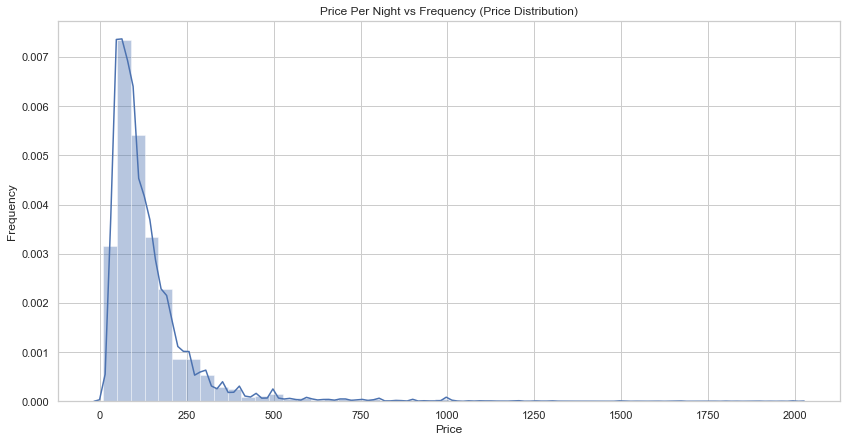

In [7]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price Per Night vs Frequency (Price Distribution)');

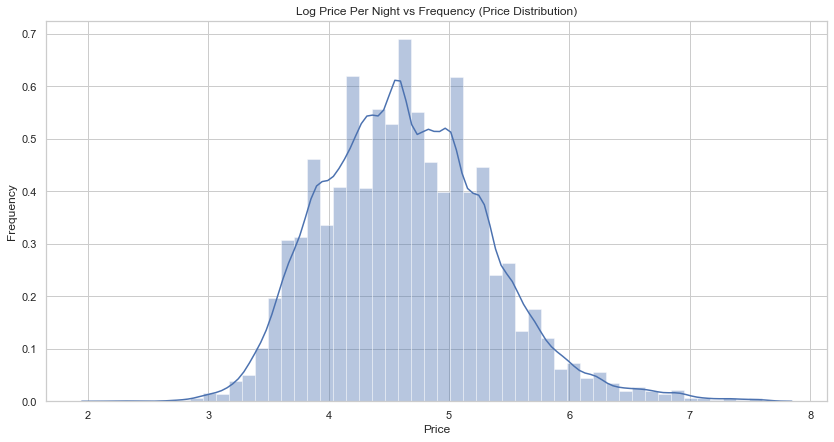

In [8]:
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Log Price Per Night vs Frequency (Price Distribution)');


In [9]:
features = list(df.columns) 

In [10]:
features

['Unnamed: 0',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'log_price',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtu

In [11]:
features.remove('Unnamed: 0')
features.remove('price')
features.remove('log_price')


In [12]:
features

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Beach essentials',
 'Beachfront',

In [13]:
df_features = df[features]

In [14]:
df_features

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,1,2,1.0,1.0,1,30,60,90,365,48,2,0,0,2,2,0,0,151,12.0,3.395218,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,1,1,3,1.0,3.0,1,13,21,40,265,340,64,6,0,1,1,0,0,165,12.0,3.412416,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,1,2,1.0,1.0,1,30,60,90,365,50,1,0,0,1,0,1,0,175,11.0,3.653552,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,4,2.0,2.0,1,12,12,20,295,1,0,0,0,1,1,0,0,171,11.0,3.902804,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
4,0,1,0,2,1.0,1.0,1,17,44,74,340,473,34,0,0,1,0,1,0,164,11.0,2.387730,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46361,0,1,1,2,1.0,1.0,1,14,44,74,164,0,0,0,0,1,1,0,0,0,6.0,5.413953,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,

In [15]:
target = df['price']

In [16]:
# df.drop(columns=['neighbourhood_group_cleansed'], axis=1, inplace=True)

# Linear Model

In [17]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
#print(lm.intercept_)
#print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

R^2:  0.3914505805755721


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9,test_size=0.2)

In [19]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [20]:
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 102.02912587051628


In [21]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 102.08877889828925
Training:  102.02912587051628 vs. Testing:  102.08877889828925


In [75]:
lm.coef_

array([ 3.32927622e+00, -5.17461311e-01,  1.57113570e+00,  3.47645458e+01,
        2.38476239e+01, -2.52326609e+00,  1.72101847e+00,  1.81173123e+01,
       -1.38121494e+01,  6.74269081e+00,  4.35772049e-01, -3.35064887e+00,
       -2.09273909e+00, -3.84228174e+00, -4.19514945e-01, -1.73446814e+02,
        1.54847783e+02,  7.58093526e+01,  3.30326555e+00, -9.70867869e-01,
        2.85573066e+00, -3.25387777e+00, -7.80769001e-01, -7.21716210e-01,
       -2.69075030e-01, -5.33539824e+00, -4.37096254e+00,  4.81990208e+00,
       -1.10148643e+00, -1.19458132e+00, -5.88092356e-01, -5.52729888e-01,
       -1.61700903e+00, -4.28308587e+00,  4.27603440e+00, -6.51932445e-01,
       -9.60701366e+12,  9.60701366e+12, -7.97063348e-01,  2.30770608e+00,
       -5.68726140e-01,  1.46900056e+00,  1.23511396e+00, -5.50526903e-01,
       -1.32680788e+00,  1.50275796e+00, -1.24751788e+00,  6.51636498e-01,
        1.30676396e+00,  8.03296105e-01,  2.27878204e+00, -2.15622976e+00,
       -2.58824808e+00,  

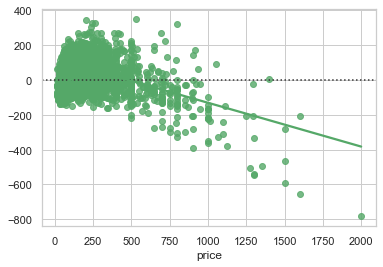

In [22]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

In [23]:
#Residual Plot above shows that as the price gets higher it gets harder to predict, and our model tends to underestimate 

### Linear Model w/ Log Target Variable

In [24]:
y_log = np.log(y_train)
y_log

6848     4.605170
23238    4.605170
40247    4.248495
12101    3.555348
13791    4.564348
           ...   
5014     4.094345
42747    4.234107
22584    3.688879
501      4.934474
20828    4.382027
Name: price, Length: 37092, dtype: float64

In [25]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log = lm_log.fit(X_train, y_log)

log_train_pred = lm_log.predict(X_train)
log_train_pred

array([4.50987599, 4.70472944, 4.0391913 , ..., 4.62432111, 4.98426454,
       4.06582623])

In [26]:
#log_train_pred the predictions to get them on the same original scale 
y_train_pred = np.exp(log_train_pred)
y_train_pred

array([ 90.91054443, 110.46839295,  56.7804062 , ..., 101.93354764,
       146.09608735,  58.31306842])

In [27]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, log_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 184.84818496192963


In [28]:
log_test_pred = lm_log.predict(X_test)
#exponentiate the predictions to get them on the same original scale 
log_test_pred = np.exp(log_test_pred)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, log_test_pred))


print('Testing Root Mean Squared Error:' , log_test_rmse)

Testing Root Mean Squared Error: 102.27701885653543


In [29]:
y_test_pred = lm_log.predict(X_test)

#our model predcicte the log of gross, so now we must exponentiate to get the value in $
y_test_pred = np.exp(y_test_pred)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 102.27701885653543
Training:  184.84818496192963 vs. Testing:  102.27701885653543


# Polynomial Model

In [30]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [31]:
poly_data = poly.fit_transform(df_features)

In [32]:
poly_columns = poly.get_feature_names(df_features.columns)

In [33]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [34]:
df_poly.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,description_count,host_since_year,dist_diff,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,sesame,sesame_offline,weibo,work_email,zhima_selfie,Air conditioning,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bathtub,Beach essentials,Beachfront,Bed linens,Bread maker,Breakfast,Building staff,Cable TV,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Crib,Dishes and silverware,Dishwasher,Dryer,EV charger,Elevator,Essentials,Ethernet connection,Extra pillows and blankets,Fire extinguisher,Fireplace guards,First aid kit,Free parking on premises,Free street parking,Game console,Garden or backyard,Gym,Hair dryer,Hangers,Heating,High chair,Host greets you,Hot tub,Hot water,Indoor fireplace,Iron,Keypad,Kitchen,Lake access,Laptop-friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Microwave,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Piano,Pocket wifi,Pool,Private entrance,Private living room,Refrigerator,Room-darkening shades,Shampoo,Shower gel,Single level home,Ski-in/Ski-out,Smart lock,Smoke alarm,Stair gates,Stove,TV,Table corner guards,Washer,Waterfront,Wifi,Window guards,hotel_room,private_room,shared_room,Brooklyn,Manhattan,Queens,Staten Island,host_is_superhost^2,host_is_superhost host_has_profile_pic,host_is_superhost host_identity_verified,host_is_superhost accommodates,host_is_superhost bedrooms,host_is_superhost beds,host_is_superhost has_availability,host_is_superhost availability_30,host_is_superhost availability_60,host_is_superhost availability_90,host_is_superhost availability_365,host_is_superhost number_of_reviews,host_is_superhost number_of_reviews_ltm,host_is_superhost number_of_reviews_l30d,host_is_superhost instant_bookable,host_is_superhost calculated_host_listings_count,host_is_superhost calculated_host_listings_count_entire_homes,host_is_superhost calculated_host_listings_count_private_rooms,...,Smart lock Stove,Smart lock TV,Smart lock Table corner guards,Smart lock Washer,Smart lock Waterfront,Smart lock Wifi,Smart lock Window guards,Smart lock hotel_room,Smart lock private_room,Smart lock shared_room,Smart lock Brooklyn,Smart lock Manhattan,Smart lock Queens,Smart lock Staten Island,Smoke alarm^2,Smoke alarm Stair gates,Smoke alarm Stove,Smoke alarm TV,Smoke alarm Table corner guards,Smoke alarm Washer,Smoke alarm Waterfront,Smoke alarm Wifi,Smoke alarm Window guards,Smoke alarm hotel_room,Smoke alarm private_room,Smoke alarm shared_room,Smoke alarm Brooklyn,Smoke alarm Manhattan,Smoke alarm Queens,Smoke alarm Staten Island,Stair gates^2,Stair gates Stove,Stair gates TV,Stair gates Table corner guards,Stair gates Washer,Stair gates Waterfront,Stair gates Wifi,Stair gates Window guards,Stair gates hotel_room,Stair gates private_room,Stair gates shared_room,Stair gates Brooklyn,Stair gates Manhattan,Stair gates Queens,Stair gates Staten Island,Stove^2,Stove TV,Stove Table corner guards,Stove Washer,Stove Waterfront,Stove Wifi,Stove Window guards,Stove hotel_room,Stove private_room,Stove shared_room,Stove Brooklyn,Stove Manhattan,Stove Queens,Stove Staten Island,TV^2,TV Table corner guards,TV Washer,TV Waterfront,TV Wifi,TV Window guards,TV hotel_room,TV private_room,TV shared_room,TV Brooklyn,TV Manhattan,TV Queens,TV Staten Island,Table corner guards^2,Table corner gua

In [71]:
## wayne

from sklearn.model_selection import train_test_split

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly, df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_poly_train.shape, "Target: ", y_poly_train.shape)
print("Test set - Features: ", X_poly_test.shape, "Target: ",y_poly_test.shape)

#### selecting helpful columns
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=50)
selector.fit(X_poly_train, y_poly_train)
selected_col = X_poly_train.columns[selector.get_support()]
 #removed_col = X_poly_train.columns[~selector.get_support()]
# print(selected_col)
# print(X_poly_train)
X_poly_train = X_poly_train[selected_col]
X_poly_test = X_poly_test[selected_col]
#print(X_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_poly_train) ## Learned the mean and std  -> standarize our values

scaler.fit(X_poly_test)


#transform the training data
X_poly_train = pd.DataFrame(data=scaler.transform(X_poly_train), columns=X_poly_train.columns)

#transform the testing data
X_poly_test = pd.DataFrame(data=scaler.transform(X_poly_test), columns=X_poly_test.columns)
# print(X_poly_train.shape, X_poly_test.shape)



lm_poly_2 = LinearRegression()

#fit the linear regression to the data
lm_poly_2 = lm_poly_2.fit(X_poly_train, y_poly_train)
lm_poly_2



y_poly_train_pred = lm_poly_2.predict(X_poly_train)
y_poly_test_pred = lm_poly_2.predict(X_poly_test)
y_poly_train_pred


#instantiate a linear regression object
from sklearn import metrics

train_poly_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_poly_train), np.exp(y_poly_train_pred)))
test_poly_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_poly_test), np.exp(y_poly_test_pred)))

print('Training Root Mean Squared Error:' , train_poly_rmse)
print('Test Root mean Sqaured Erro:', test_poly_rmse)


### R SQUARED
print('R-SQUARED:', lm_poly_2.score(X_poly_train, y_poly_train), lm_poly_2.score(X_poly_test, y_poly_test))
test_poly_rmse = test_poly_rmse

Training set - Features:  (37092, 8910) Target:  (37092,)
Test set - Features:  (9274, 8910) Target:  (9274,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Training Root Mean Squared Error: 115.59500614805944
Test Root mean Sqaured Erro: 120.1296466159331
R-SQUARED: 0.4975134340839009 0.49637458034870635


# Selecting Best Features for Linear Model 

### F Test

In [37]:
X_train.shape

(37092, 132)

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7ffcfb484950>)

In [39]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [40]:
list(selected_columns)

['accommodates',
 'bedrooms',
 'beds',
 'Air conditioning',
 'Cable TV',
 'Crib',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'Gym',
 'Indoor fireplace',
 'Lock on bedroom door',
 'Pack ’n Play/travel crib',
 'Pool',
 'TV',
 'Washer',
 'private_room',
 'Brooklyn',
 'Manhattan',
 'Queens']

In [41]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 105.51997003087162
Testing Root Mean Squared Error: 105.14440623492108


In [42]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  102.27701885653543 
 KBest:    105.14440623492108 



### Recursive Feature Elimination

In [43]:
from sklearn.feature_selection import RFECV

In [44]:
ols = linear_model.LinearRegression()

In [45]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [46]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [47]:
list(selected_rfe)

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bedrooms',
 'beds',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'description_count',
 'host_since_year',
 'dist_diff',
 'email',
 'facebook',
 'google',
 'government_id',
 'identity_manual',
 'jumio',
 'kba',
 'manual_offline',
 'manual_online',
 'offline_government_id',
 'phone',
 'reviews',
 'selfie',
 'sent_id',
 'sesame',
 'sesame_offline',
 'weibo',
 'work_email',
 'zhima_selfie',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Beach essentials',
 'Beachfront',

In [48]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


Training Root Mean Squared Error: 102.02912587051628
Testing Root Mean Squared Error: 102.08877889828925


In [49]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',
      "RFE:     ", testRFE_rmse)

Original:  102.27701885653543 
 KBest:    105.14440623492108 
 RFE:      102.08877889828925


### Embredded Method: Lasso

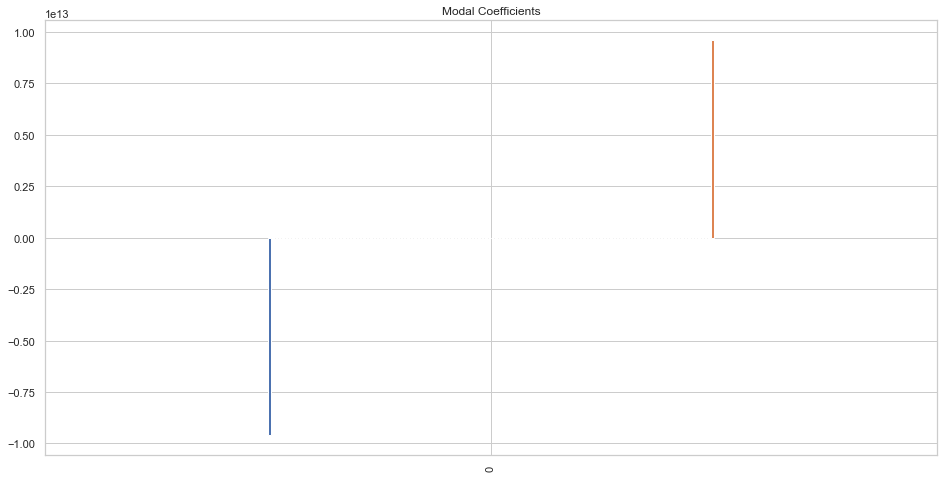

In [50]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [51]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5, normalize=False)

lasso.fit(X_train,y_train)

y_train_lasso01 = lasso.predict(X_train)
y_test_lasso01 = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_lasso01)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_test_lasso01))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )


Training Error: 53.75046254577891
Testing Error: 102.3522696161064


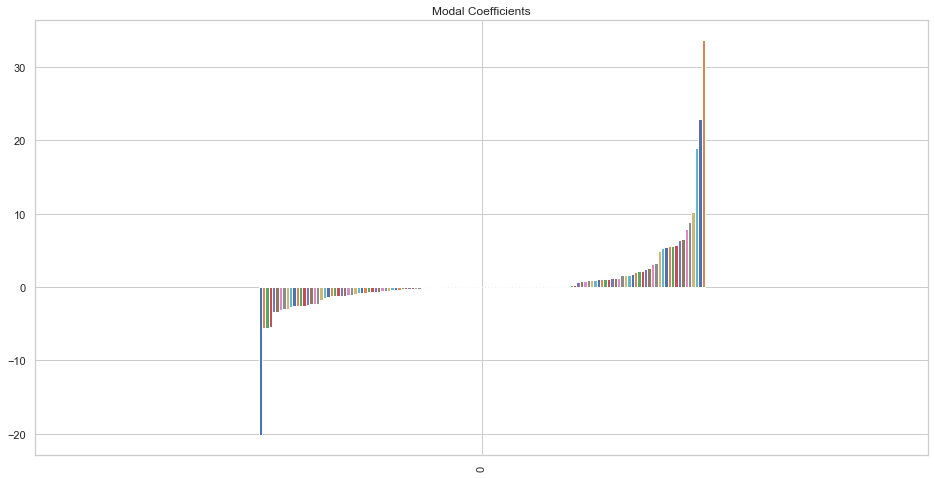

In [52]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [53]:
coeff_df = lasso_coef01.T

coeff_df[coeff_df[0]==0].count()

0    30
dtype: int64

In [67]:
## lassoCV
### modeling normal linear regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df['log_price'], random_state=42, test_size = 0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

from sklearn.preprocessing import StandardScaler


#### selecting helpful columns



scaler_normal = StandardScaler()
#print(X_train.shape, y_train.shape)

# fit the scaler to the training data
scaler_normal.fit(X_train) ## Learned the mean and std  -> standarize our values

#transform the training data
X_train = pd.DataFrame(data=scaler_normal.transform(X_train), columns=df_features.columns)


#transform the testing data
X_test = pd.DataFrame(data=scaler_normal.transform(X_test), columns=df_features.columns)
# print(X_train.shape, X_test.shape)

from sklearn.linear_model import LassoCV
lm_norm = LassoCV(cv=5,random_state=40)

#fit the linear regression to the data
lm_norm = lm_norm.fit(X_train, y_train)

# how to determine if your model is overfit?
y_train_pred = lm_norm.predict(X_train)
y_test_pred = lm_norm.predict(X_test)

#instantiate a linear regression object
from sklearn import metrics

train_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_train), np.exp(y_train_pred)))
test_norm_rmse = np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_test_pred)))

print('Training Root Mean Squared Error:' , train_norm_rmse)
print('Test Root Mean Squared Error:' , test_norm_rmse)
print('R-SQUARED: (train)', lm_norm.score(X_train, y_train), '(test)', lm_norm.score(X_test, y_test))
test_lassocv_rmse = test_norm_rmse

Training set - Features:  (37092, 132) Target:  (37092,)
Training set - Features:  (9274, 132) Target:  (9274,)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5179964829148958, tolerance: 1.4188460443077375
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.242472720206024, tolerance: 1.4188460443077375
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.760253047857077, tolerance: 1.4188460443077375
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You 

Training Root Mean Squared Error: 108.82298891855541
Test Root Mean Squared Error: 112.55536871298548
R-SQUARED: (train) 0.5945484796626819 (test) 0.5875722556369265


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.41744332649523, tolerance: 1.7710506893524598
  positive)


In [72]:
print('Original: \t', test_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "RFE: \t \t", testRFE_rmse, '\n', 
      "Lasso 0.1: \t",  test_rmse_lasso01, '\n',
      "lassoCV:  \t", test_lassocv_rmse, '\n',
      "poly_rmse:  \t", test_poly_rmse 
     )

Original: 	 102.27701885653543 
 KBest: 	 105.14440623492108 
 RFE: 	 	 102.08877889828925 
 Lasso 0.1: 	 102.3522696161064 
 lassoCV:  	 112.55536871298548 
 poly_rmse:  	 120.1296466159331


In [77]:
# sns.residplot(y_train_pred, y_test_pred, lowess=True, color="g")


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 37092 and the array at index 1 has size 9274